In [ ]:
import tensorflow as tf
tf.__version__

'2.8.2'

In [ ]:
!pip install tensorflow

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
!pip install tensorflow-object-detection-api

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 577 kB 5.1 MB/s 
     |████████████████████████████████| 54 kB 2.8 MB/s 
     |████████████████████████████████| 48 kB 4.5 MB/s 
     |████████████████████████████████| 4.1 MB 55.2 MB/s 
  Created wheel for tensorflow-object-detection-api: filename=tensorflow_object_detection_api-0.1.1-py3-none-any.whl size=844512 sha256=a711ad95db2f12b137e861c62e74797fb8b5858ff159364e5d619371501c5c3e
  Stored in directory: /root/.cache/pip/wheels/71/7e/a2/461ab817fbaef68ec9cc60df16d3669d1285f032e4c98179bf
Successfully built tensorflow-object-detection-api


In [ ]:
!git clone --quiet https://github.com/tensorflow/models.git

In [ ]:
import os
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '1'    # Suppress TensorFlow logging (1)
import pathlib
import tensorflow as tf

In [ ]:
PATH_TO_MODEL_DIR = '/content/drive/MyDrive/export'

In [ ]:
PATH_TO_LABELS = "/content/drive/MyDrive/Tensorflow-Object-Detection/data/annotations/label_map.pbtxt"

In [ ]:
import time
from object_detection.utils import label_map_util
from object_detection.utils import visualization_utils as viz_utils

PATH_TO_SAVED_MODEL = PATH_TO_MODEL_DIR + "/saved_model"

print('Loading model...', end='')
start_time = time.time()

# Load saved model and build the detection function
detect_fn = tf.saved_model.load(export_dir=PATH_TO_SAVED_MODEL)

end_time = time.time()
elapsed_time = end_time - start_time
print('Done! Took {} seconds'.format(elapsed_time))

Loading model...Done! Took 35.57078814506531 seconds


In [ ]:
PATH_TO_SAVED_MODEL

'/content/drive/MyDrive/export/saved_model'

In [ ]:
%cd /content/sample_data

!python /content/sample_data/label_map_util.py


/content/sample_data
python3: can't open file '/content/sample_data/label_map_util.py': [Errno 2] No such file or directory


In [ ]:
# category_index = label_map_util.create_category_index_from_labelmap(PATH_TO_LABELS,
#                                                                     use_display_name=True)

In [ ]:
category_index = {1: {'id': 1, 'name': 'wheel_chair'}}

In [ ]:
IMAGE_PATHS = ['/content/sample_data/istockphoto-1282662812-612x612.jpg','/content/sample_data/istockphoto-1337465456-612x612.jpg','/content/sample_data/istockphoto-835310744-612x612.jpg','/content/sample_data/istockphoto-506097790-612x612.jpg']

Running inference for /content/sample_data/istockphoto-1282662812-612x612.jpg... 

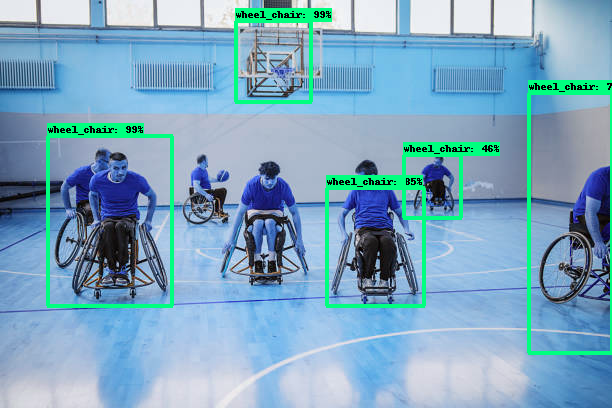

Done
Running inference for /content/sample_data/istockphoto-1337465456-612x612.jpg... 

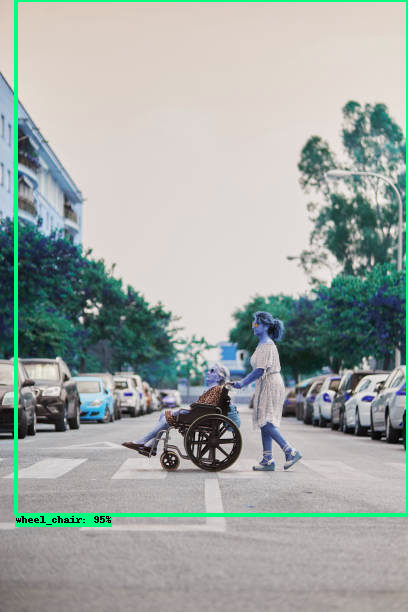

Done
Running inference for /content/sample_data/istockphoto-835310744-612x612.jpg... 

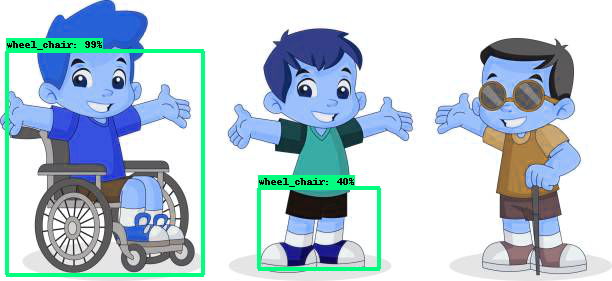

Done
Running inference for /content/sample_data/istockphoto-506097790-612x612.jpg... 

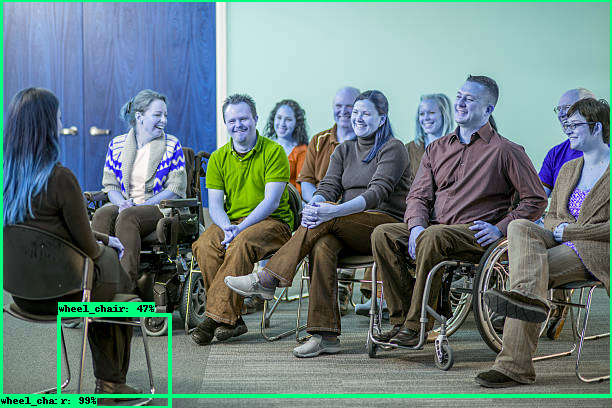

Done


In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')   # Suppress Matplotlib warnings

def load_image_into_numpy_array(path):
    """Load an image from file into a numpy array.

    Puts image into numpy array to feed into tensorflow graph.
    Note that by convention we put it into a numpy array with shape
    (height, width, channels), where channels=3 for RGB.

    Args:
      path: the file path to the image

    Returns:
      uint8 numpy array with shape (img_height, img_width, 3)
    """
    return np.array(Image.open(path))


for image_path in IMAGE_PATHS:

    print('Running inference for {}... '.format(image_path), end='')

    image_np = load_image_into_numpy_array(image_path)

    # Things to try:
    # Flip horizontally
    # image_np = np.fliplr(image_np).copy()

    # Convert image to grayscale
    # image_np = np.tile(
    #     np.mean(image_np, 2, keepdims=True), (1, 1, 3)).astype(np.uint8)

    # The input needs to be a tensor, convert it using `tf.convert_to_tensor`.
    input_tensor = tf.convert_to_tensor(image_np)
    # The model expects a batch of images, so add an axis with `tf.newaxis`.
    input_tensor = input_tensor[tf.newaxis, ...]

    # input_tensor = np.expand_dims(image_np, 0)
    detections = detect_fn(input_tensor)

    # All outputs are batches tensors.
    # Convert to numpy arrays, and take index [0] to remove the batch dimension.
    # We're only interested in the first num_detections.
    num_detections = int(detections.pop('num_detections'))
    detections = {key: value[0, :num_detections].numpy()
                   for key, value in detections.items()}
    detections['num_detections'] = num_detections

    # detection_classes should be ints.
    detections['detection_classes'] = detections['detection_classes'].astype(np.int64)

    image_np_with_detections = image_np.copy()

    viz_utils.visualize_boxes_and_labels_on_image_array(
          image_np_with_detections,
          detections['detection_boxes'],
          detections['detection_classes'],
          detections['detection_scores'],
          category_index,
          use_normalized_coordinates=True,
          max_boxes_to_draw=200,
          min_score_thresh=.30,
          agnostic_mode=False)

    plt.figure()
    cv2_imshow(image_np_with_detections)
    print('Done')
plt.show()

# sphinx_gallery_thumbnail_number = 2

In [ ]:
plt.imshow(image_np_with_detections)
plt.show()

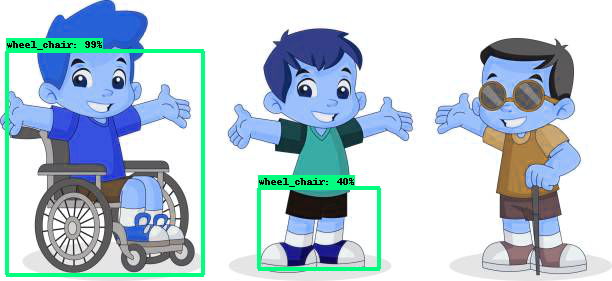

In [ ]:
from google.colab.patches import cv2_imshow
cv2_imshow(image_np_with_detections)